# YT Plotting notebook 

This goes through some simple plotting with YT, using a 2D Athena++ MHD simulation of an alfven wave as the basic dataset.

In [59]:
# Matplotlib plotting modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
%matplotlib notebook

##numpy and file editing
import numpy as np
import glob

# Problem/physics modules
import units_Parker

##YT modules
import yt
from yt.visualization.api import Streamlines
import yt.units as u
#UNCOMMENT for interactive plots
#yt.toggle_interactivity()

Using matplotlib backend: nbAgg


In [52]:
path   = './'
prob   = 'Parker'
outfileNom = "parker"
run = "testAW"
suffix = 'athdf'
out = 1

myUnits = units_Parker.Parker()

units= {"length_unit":(myUnits.ls.value,str(myUnits.ls.unit)),
                  "time_unit":(myUnits.ts.value,str(myUnits.ts.unit)),
                  "mass_unit":(myUnits.ms.value,str(myUnits.ms.unit))}

fileName = ("%s%s/%s/%s.out%1i*.%s") % (path, prob, run,
                                            outfileNom,out,suffix)

fileLst = glob.glob(fileName)
fileLst = np.sort(fileLst)

dsLst = []
for file in fileLst:
    ds = yt.load(file,units_override=units)
    dsLst.append(ds)
print(dsLst)

[parker.out1.00000, parker.out1.00001, parker.out1.00002, parker.out1.00003, parker.out1.00004, parker.out1.00005, parker.out1.00006, parker.out1.00007, parker.out1.00008, parker.out1.00009, parker.out1.00010, parker.out1.00011, parker.out1.00012, parker.out1.00013, parker.out1.00014, parker.out1.00015, parker.out1.00016, parker.out1.00017, parker.out1.00018, parker.out1.00019, parker.out1.00020, parker.out1.00021, parker.out1.00022, parker.out1.00023, parker.out1.00024, parker.out1.00025, parker.out1.00026, parker.out1.00027, parker.out1.00028, parker.out1.00029, parker.out1.00030, parker.out1.00031, parker.out1.00032, parker.out1.00033, parker.out1.00034, parker.out1.00035]


Now we have our dataset. What do we want to plot? Let's make a 2D colorplot of density at a given time step.



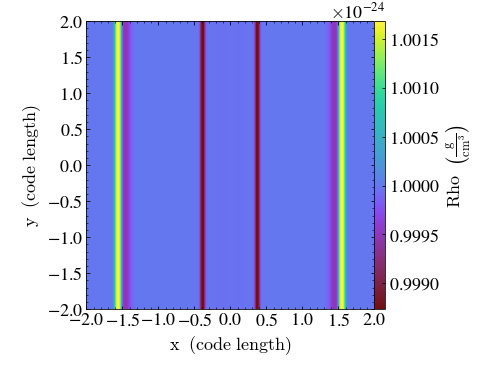


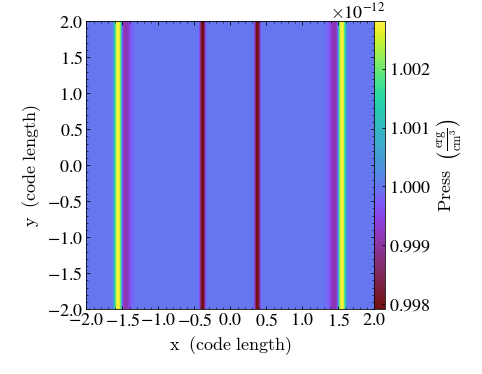

In [53]:
#Which time step to plot
t = 6

#Make a slice plot. For a 2d data set with no z dependence, we can use
slc1 = yt.SlicePlot(dsLst[t],'z',('athena_pp','rho'))
# or it can be simplified to the function plot_2d
slc2 = yt.plot_2d(dsLst[t],('athena_pp','press'))

slc2.set_axes_unit(("pc","m"))
slc1.set_axes_unit(r"kpc")


slc1.set_unit(('athena_pp','rho'),'g/cm**3')
slc1.set_log(('athena_pp','rho'),False)

slc2.set_unit(('athena_pp','press'),'erg/cm**3')
slc2.set_log(('athena_pp','press'),False)

slc1.set_window_size(4)
slc2.set_window_size(4)
slc1.show()
slc2.show()

The more important quantity in an alfven wave is the magnetic field. Let's plot magnetic field lines along the pressure:

/opt/anaconda3/lib/python3.8/site-packages/yt/visualization/base_plot_types.py:220: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(


<IPython.core.display.Javascript object>


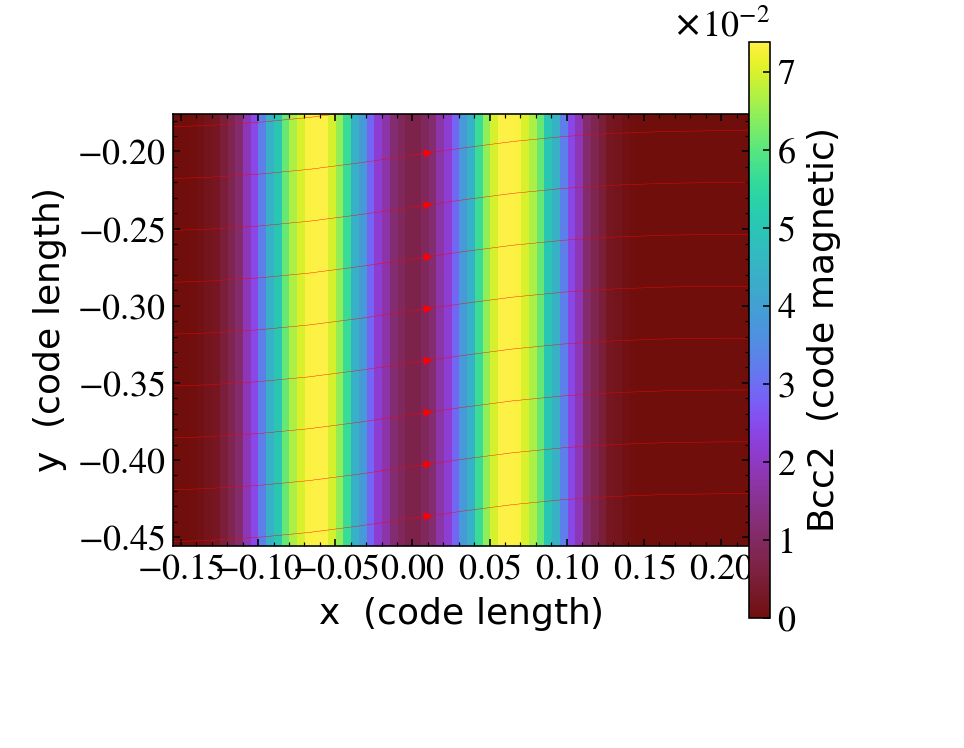

In [60]:
slc = yt.plot_2d(dsLst[1],('athena_pp','Bcc2'))

#slc.set_unit(('athena_pp','press'),'erg/cm**3')
slc.set_log(('athena_pp','Bcc2'),False)

slc.set_window_size(4)
slc.annotate_streamlines('Bcc1',
                         'Bcc2',
                         density=4,plot_args={'linewidth':0.2,'color':'r'})
slc.show()





#yt.LinePlot(ds,[('density'),('Bcc2')],(0,0,-1),(4,0,-1),1000)

